In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Kaggle
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle
 adult.csv   data_stroke.csv   Lets   Reviews.csv  'TripAdvisor Reviews.csv'


In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('data_stroke.csv')

In [ ]:
df.shape

(5110, 12)

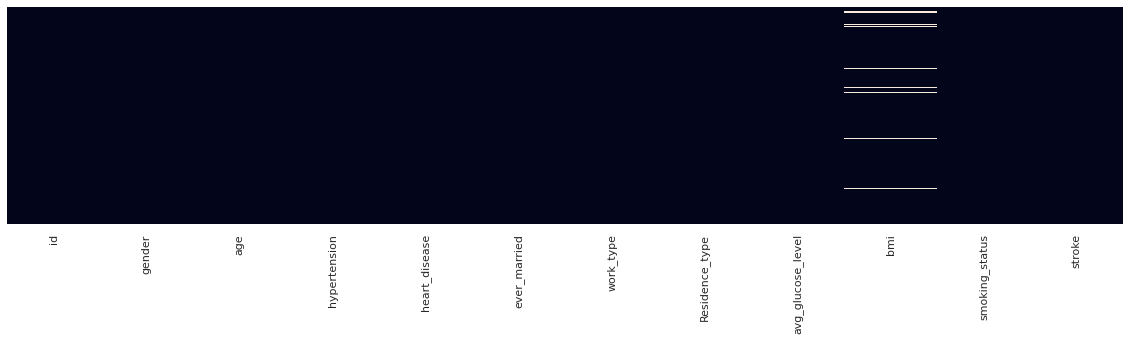

In [ ]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df["bmi"] = df["bmi"].fillna(value=df["bmi"].mean())

In [ ]:
df=df.drop(['id'],axis=1)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


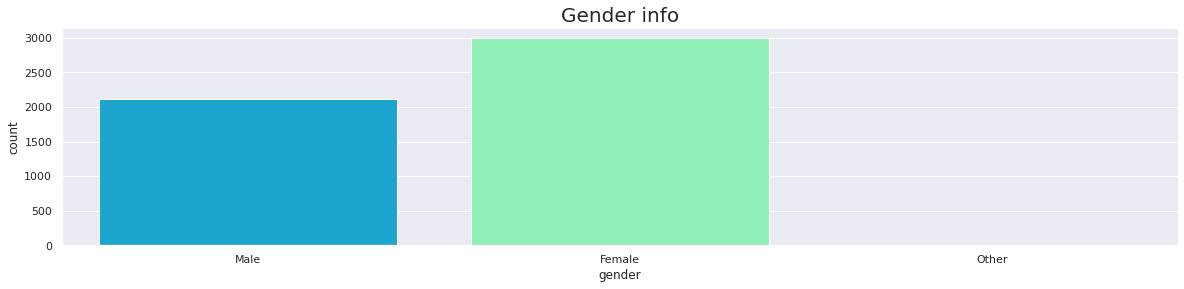

In [ ]:
plt.rcParams['figure.figsize'] = (20, 4)
sns.countplot(df['gender'], palette = 'rainbow')
plt.title('Gender info', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


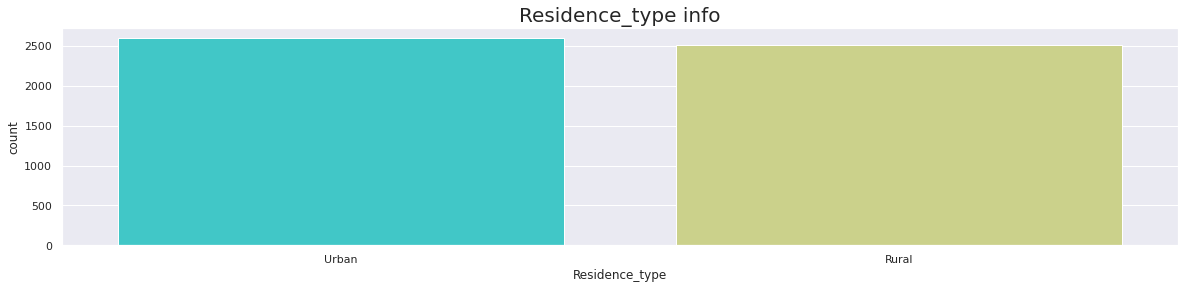

In [ ]:
plt.rcParams['figure.figsize'] = (20, 4)
sns.countplot(df['Residence_type'], palette = 'rainbow')
plt.title('Residence_type info', fontsize = 20)
plt.show()

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
from sklearn import preprocessing
#no priority issue will bump here because female ratio is higher so value of 0 is good 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'gender'.
df['gender']= label_encoder.fit_transform(df['gender'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
  


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


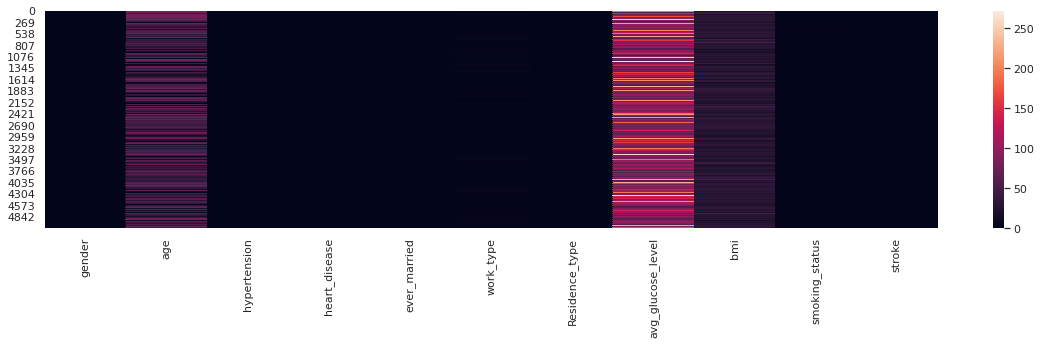

In [ ]:
ax = sns.heatmap(df)

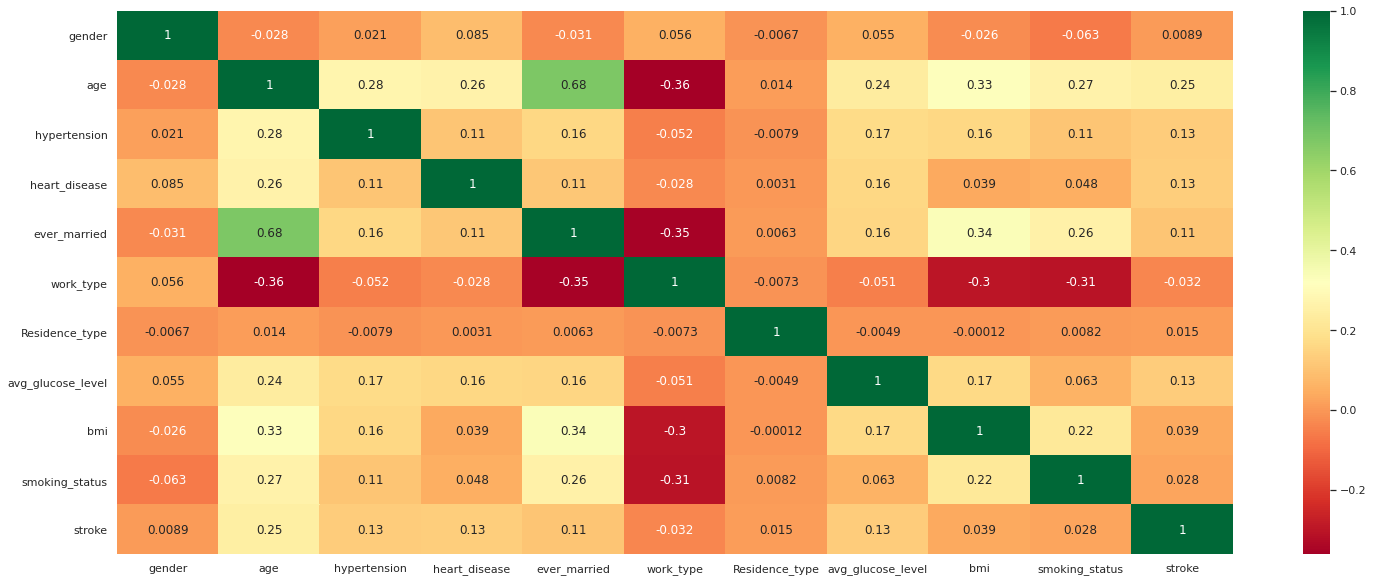

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import math as m
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(df.drop(['stroke'],axis=1),df.stroke,test_size=0.30,random_state=0)

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_pred = svc_model.predict(X_test)
svc_cm = confusion_matrix(y_test,svc_pred)
svc_cr = classification_report(y_test,svc_pred)
svc_as = accuracy_score(y_test,svc_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test,knn_pred)
knn_cr = classification_report(y_test,knn_pred)
knn_as = accuracy_score(y_test,knn_pred)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_cm = confusion_matrix(y_test,dtc_pred)
dtc_cr = classification_report(y_test,dtc_pred)
dtc_as = accuracy_score(y_test,dtc_pred)

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_pred = nbc.predict(X_test)
nbc_cm = confusion_matrix(y_test,nbc_pred)
nbc_cr = classification_report(y_test,nbc_pred)
nbc_as = accuracy_score(y_test,nbc_pred)

In [ ]:
print(svc_cm)
print(svc_cr)
print(svc_as)

[[1457    0]
 [  76    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533

0.9504240052185258


In [ ]:
print(knn_cm)
print(knn_cr)
print(knn_as)

[[1435   22]
 [  71    5]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1457
           1       0.19      0.07      0.10        76

    accuracy                           0.94      1533
   macro avg       0.57      0.53      0.53      1533
weighted avg       0.91      0.94      0.93      1533

0.9393346379647749


In [ ]:
print(dtc_cm)
print(dtc_cr)
print(dtc_as)

[[1398   59]
 [  63   13]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1457
           1       0.18      0.17      0.18        76

    accuracy                           0.92      1533
   macro avg       0.57      0.57      0.57      1533
weighted avg       0.92      0.92      0.92      1533

0.9204174820613177


In [ ]:
print(nbc_cm)
print(nbc_cr)
print(nbc_as)

[[1314  143]
 [  44   32]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1457
           1       0.18      0.42      0.25        76

    accuracy                           0.88      1533
   macro avg       0.58      0.66      0.59      1533
weighted avg       0.93      0.88      0.90      1533

0.878016960208741


In [ ]:
averaged_preds = (svc_pred + knn_pred + dtc_pred+nbc_pred)//4
acc = accuracy_score(y_test, averaged_preds)
print(svc_as)
print(knn_as)
print(dtc_as)
print(nbc_as)
print(acc)

0.9504240052185258
0.9393346379647749
0.9204174820613177
0.878016960208741
0.9504240052185258


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
voting_clf = VotingClassifier(estimators=[('SVC_hard', svc_model), ('DTC_hard', dtc), ('NBC_hard', nbc),('KNN_hard',knn)], voting='hard')
voting_clf.fit(X_train, y_train)
prediction=voting_clf.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[1454    3]
 [  75    1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.25      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533

0.949119373776908


In [ ]:
voting_clf_soft = VotingClassifier(estimators=[('SVC_soft', SVC(probability=True)), ('DTC_soft', dtc), ('NBC_soft', nbc),('KNN_soft',knn)],voting='soft')
voting_clf_soft.fit(X_train, y_train)
predictions=voting_clf_soft.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[1442   15]
 [  70    6]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.29      0.08      0.12        76

    accuracy                           0.94      1533
   macro avg       0.62      0.53      0.55      1533
weighted avg       0.92      0.94      0.93      1533

0.9445531637312459


In [ ]:

array=[10,20,40,60,80,100]
for i in range(0,6):
  random_forest = RandomForestClassifier(n_estimators=10)
  random_forest.fit(X_train,y_train)
  rf_predict=random_forest.predict(X_test)
  print('Accuracy of Rain Forest when estimate is ',array[i], ' : ',accuracy_score(y_test,rf_predict))

Accuracy of Rain Forest when estimate is  10  :  0.9484670580560991
Accuracy of Rain Forest when estimate is  20  :  0.9478147423352903
Accuracy of Rain Forest when estimate is  40  :  0.9478147423352903
Accuracy of Rain Forest when estimate is  60  :  0.9478147423352903
Accuracy of Rain Forest when estimate is  80  :  0.9478147423352903
Accuracy of Rain Forest when estimate is  100  :  0.949119373776908


In [ ]:
array=[10,20,40,60,80,100]
for i in range(0,6):
  ada_boost = AdaBoostClassifier(n_estimators=array[i], random_state=12)
  ada_boost.fit(X_train,y_train)
  ada_predict=ada_boost.predict(X_test)
  print('Accuracy when estimate is ',array[i], ' : ',accuracy_score(y_test,ada_predict))

Accuracy when estimate is  10  :  0.9504240052185258
Accuracy when estimate is  20  :  0.9504240052185258
Accuracy when estimate is  40  :  0.9497716894977168
Accuracy when estimate is  60  :  0.9497716894977168
Accuracy when estimate is  80  :  0.9484670580560991
Accuracy when estimate is  100  :  0.9484670580560991


In [ ]:
kf=KFold(n_splits=5,shuffle=True)
data=df.drop(['stroke'],axis=1)
print(data)

      gender   age  hypertension  ...  avg_glucose_level        bmi  smoking_status
0          1  67.0             0  ...             228.69  36.600000               1
1          0  61.0             0  ...             202.21  28.893237               2
2          1  80.0             0  ...             105.92  32.500000               2
3          0  49.0             0  ...             171.23  34.400000               3
4          0  79.0             1  ...             174.12  24.000000               2
...      ...   ...           ...  ...                ...        ...             ...
5105       0  80.0             1  ...              83.75  28.893237               2
5106       0  81.0             0  ...             125.20  40.000000               2
5107       0  35.0             0  ...              82.99  30.600000               2
5108       1  51.0             0  ...             166.29  25.600000               1
5109       0  44.0             0  ...              85.28  26.200000         

In [ ]:
array = array=[10,20,40,60,80,100]
for i in range(0,6):
  rf = RandomForestClassifier(n_estimators=array[i])
  rf_accuracy=cross_val_score(rf,data,df.stroke,scoring='accuracy',cv=kf)
  print('Rain Forest KFold accuracy when estimate is ',array[i],' : ', rf_accuracy.mean()*100)

Rain Forest KFold accuracy when estimate is  10  :  94.7358121330724
Rain Forest KFold accuracy when estimate is  20  :  95.04892367906066
Rain Forest KFold accuracy when estimate is  40  :  94.9706457925636
Rain Forest KFold accuracy when estimate is  60  :  94.9119373776908
Rain Forest KFold accuracy when estimate is  80  :  95.06849315068493
Rain Forest KFold accuracy when estimate is  100  :  94.95107632093934


In [ ]:
array=[10,20,40,60,80,100]
for i in range(0,6):
  ada_boost = AdaBoostClassifier(n_estimators=array[i])
  ada_boost_accuracy=cross_val_score(rf,data,df.stroke,scoring='accuracy',cv=kf)
  print('Ada Boost KFold accuracy when estimate is ',array[i],' : ', ada_boost_accuracy.mean()*100)

Ada Boost KFold accuracy when estimate is  10  :  94.9119373776908
Ada Boost KFold accuracy when estimate is  20  :  94.99021526418787
Ada Boost KFold accuracy when estimate is  40  :  95.00978473581213
Ada Boost KFold accuracy when estimate is  60  :  94.9706457925636
Ada Boost KFold accuracy when estimate is  80  :  95.00978473581213
Ada Boost KFold accuracy when estimate is  100  :  95.00978473581213
